In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from Data_Analyzer import Analyzer
from plotting_fn import plot_confusion_matrices, plot_testing_accuracies, plot_f1_scores, feature_weights
from Models import Models

In [2]:
def wrangle(df):
    # Converting the TotalCharges column to numeric
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Converting SeniroCitizen to a categorical column
    df['SeniorCitizen'] = df['SeniorCitizen'].astype('bool')

    # Drop any empty row
    df.dropna(inplace=True)
    df.drop('customerID', axis=1, inplace=True)

    return df

In [3]:
initial_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = wrangle(initial_data)
print("Total instances are: ", df.shape[0])
df.head(2)

Total instances are:  7032


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   bool   
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [5]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [6]:
categorical_types = df.select_dtypes(include=['object']).columns
categorical_unique_values = {col: df[col].nunique() for col in categorical_types}

In [7]:
categorical_unique_values

{'gender': 2,
 'Partner': 2,
 'Dependents': 2,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'Churn': 2}

As we can see that there are nothing special for categorical columns. Mostly it has 2-3 category. So that's didn't help us in predicting. We will drop that in wrangle function.

## Let's do some Data Analysis

In [8]:
analyzer = Analyzer(df)

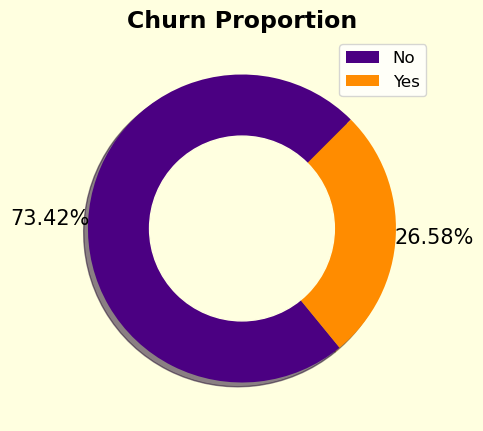

In [9]:
analyzer.churn_proportion()

Let's now analyze only thoee customer who churned

####Let's start from demographic

In [10]:
# Create pie chart for all churn customer
churn_data = df[df['Churn'] == 'Yes']
demographics_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
customer_account_cols = ["Contract","PaperlessBilling","PaymentMethod"]
customer_services_cols = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

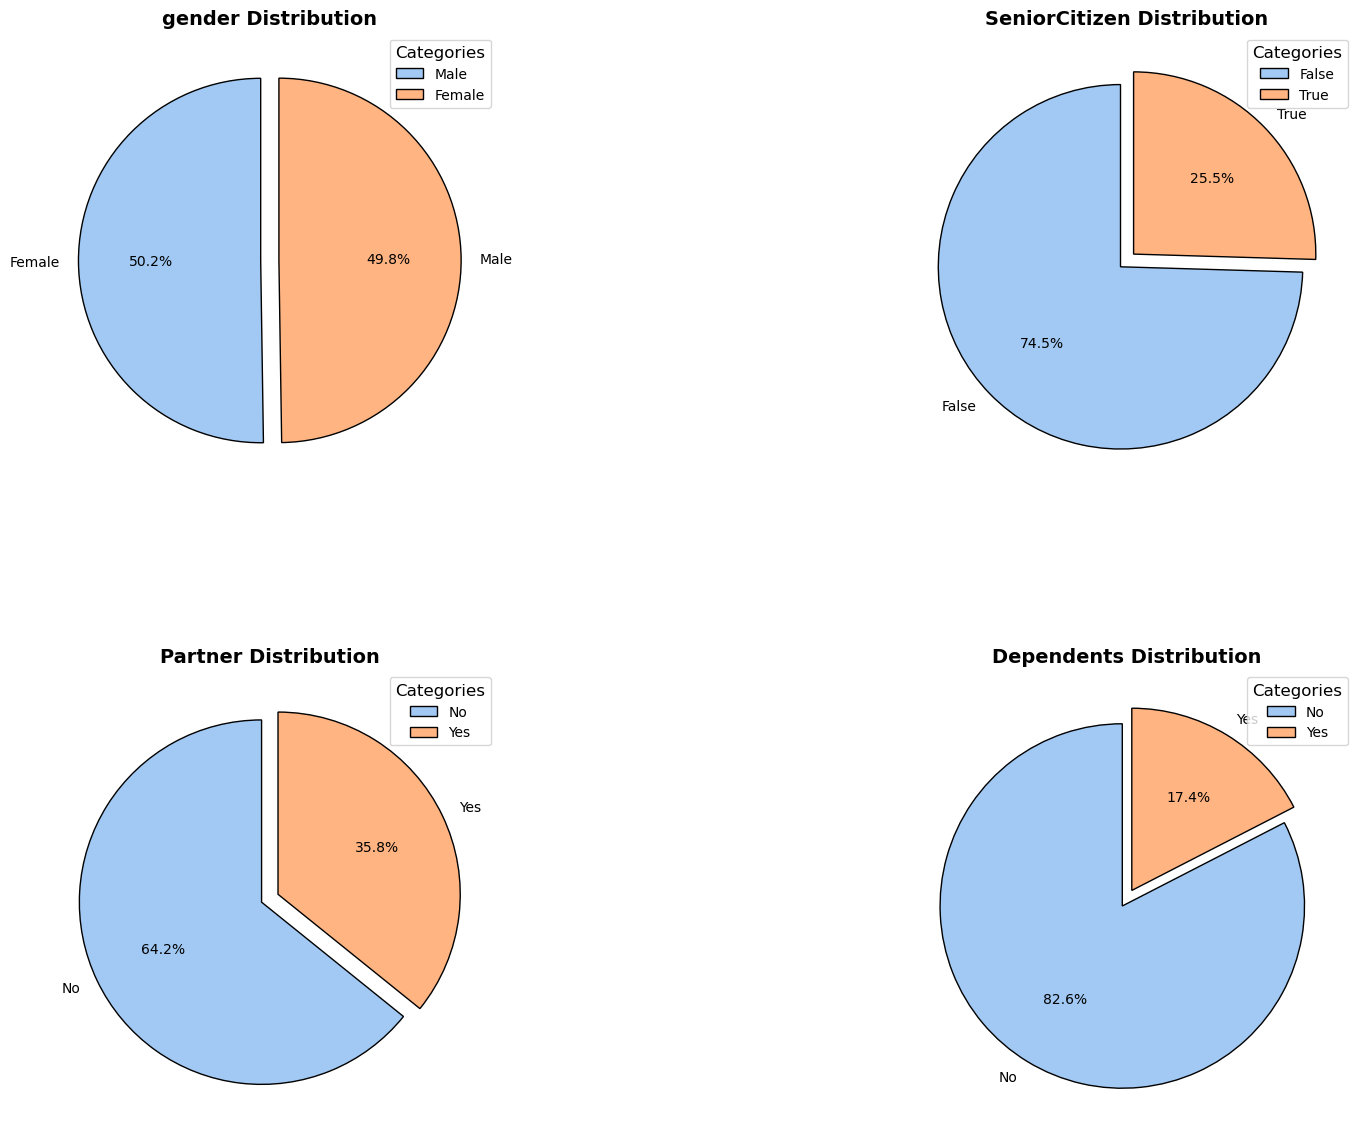

In [11]:
analyzer.plot_churn_data(demographics_cols)

We can conclude the following from the above visualization
* The customer who churn contain almost same amount of male and female
* Senior citizen are less likely to churn
* Dependent persons are less likely to churn
* Partners are more likely to churn


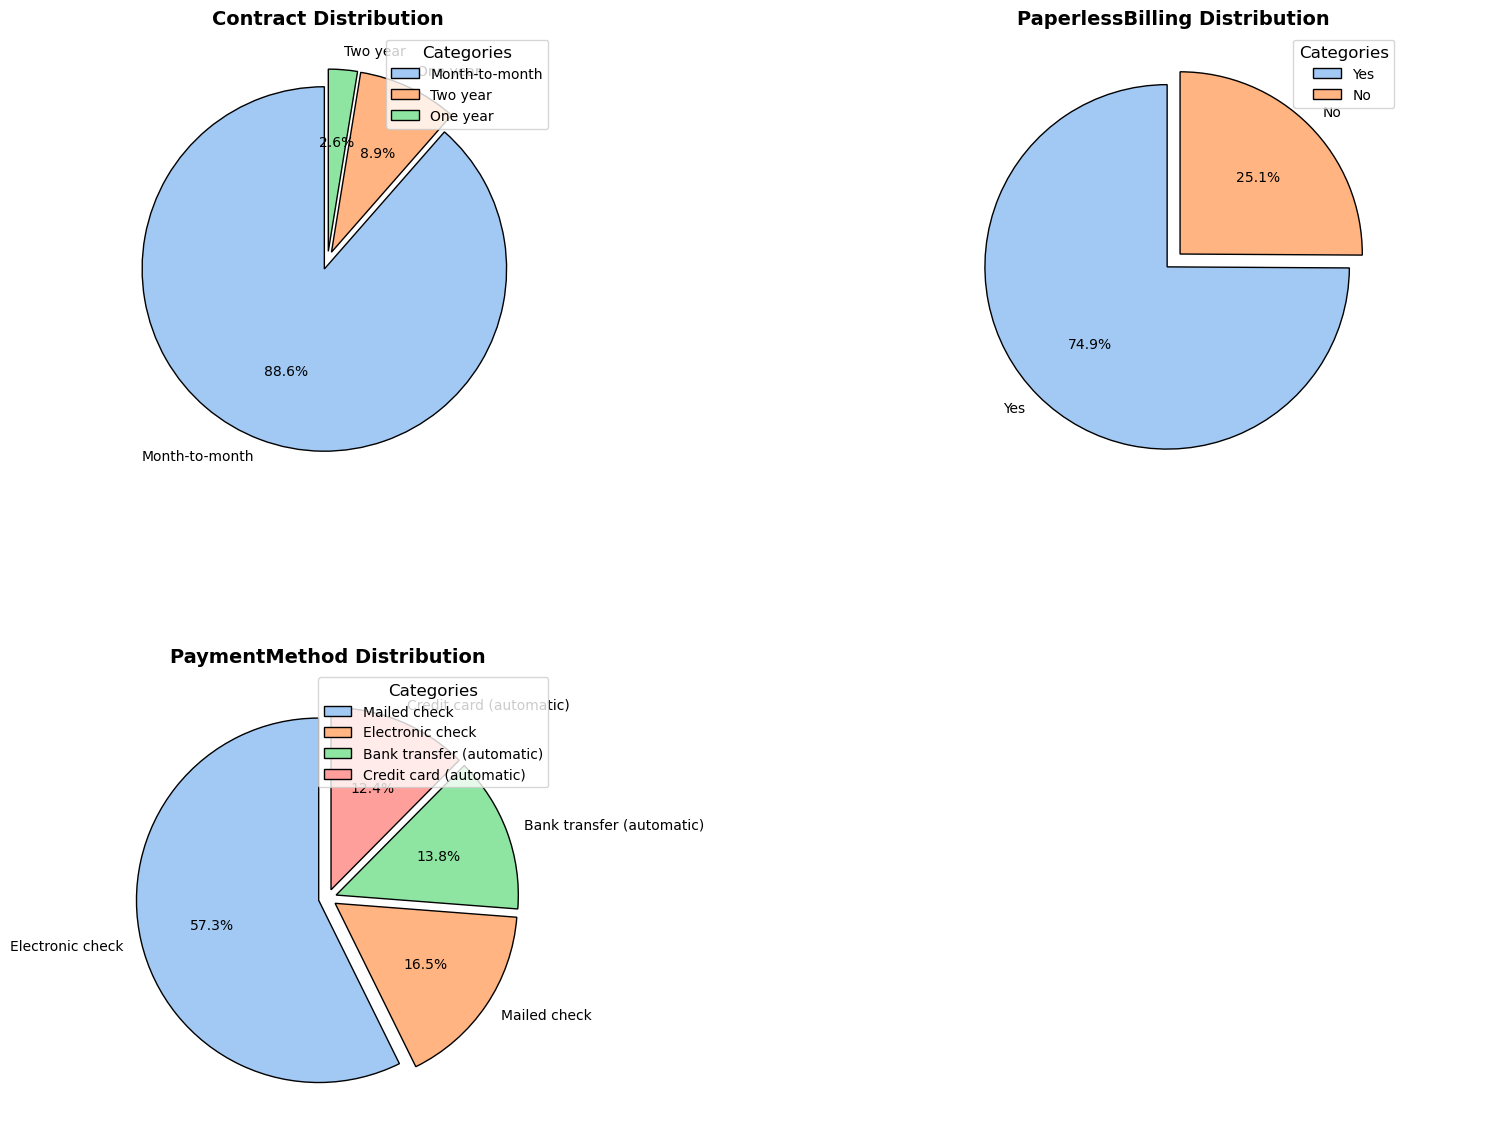

In [12]:
analyzer.plot_churn_data(customer_account_cols)

As you can see that in Churn customer, the most percentage of people who has month-to-month contract.<br>
The point of interest here is the contract type

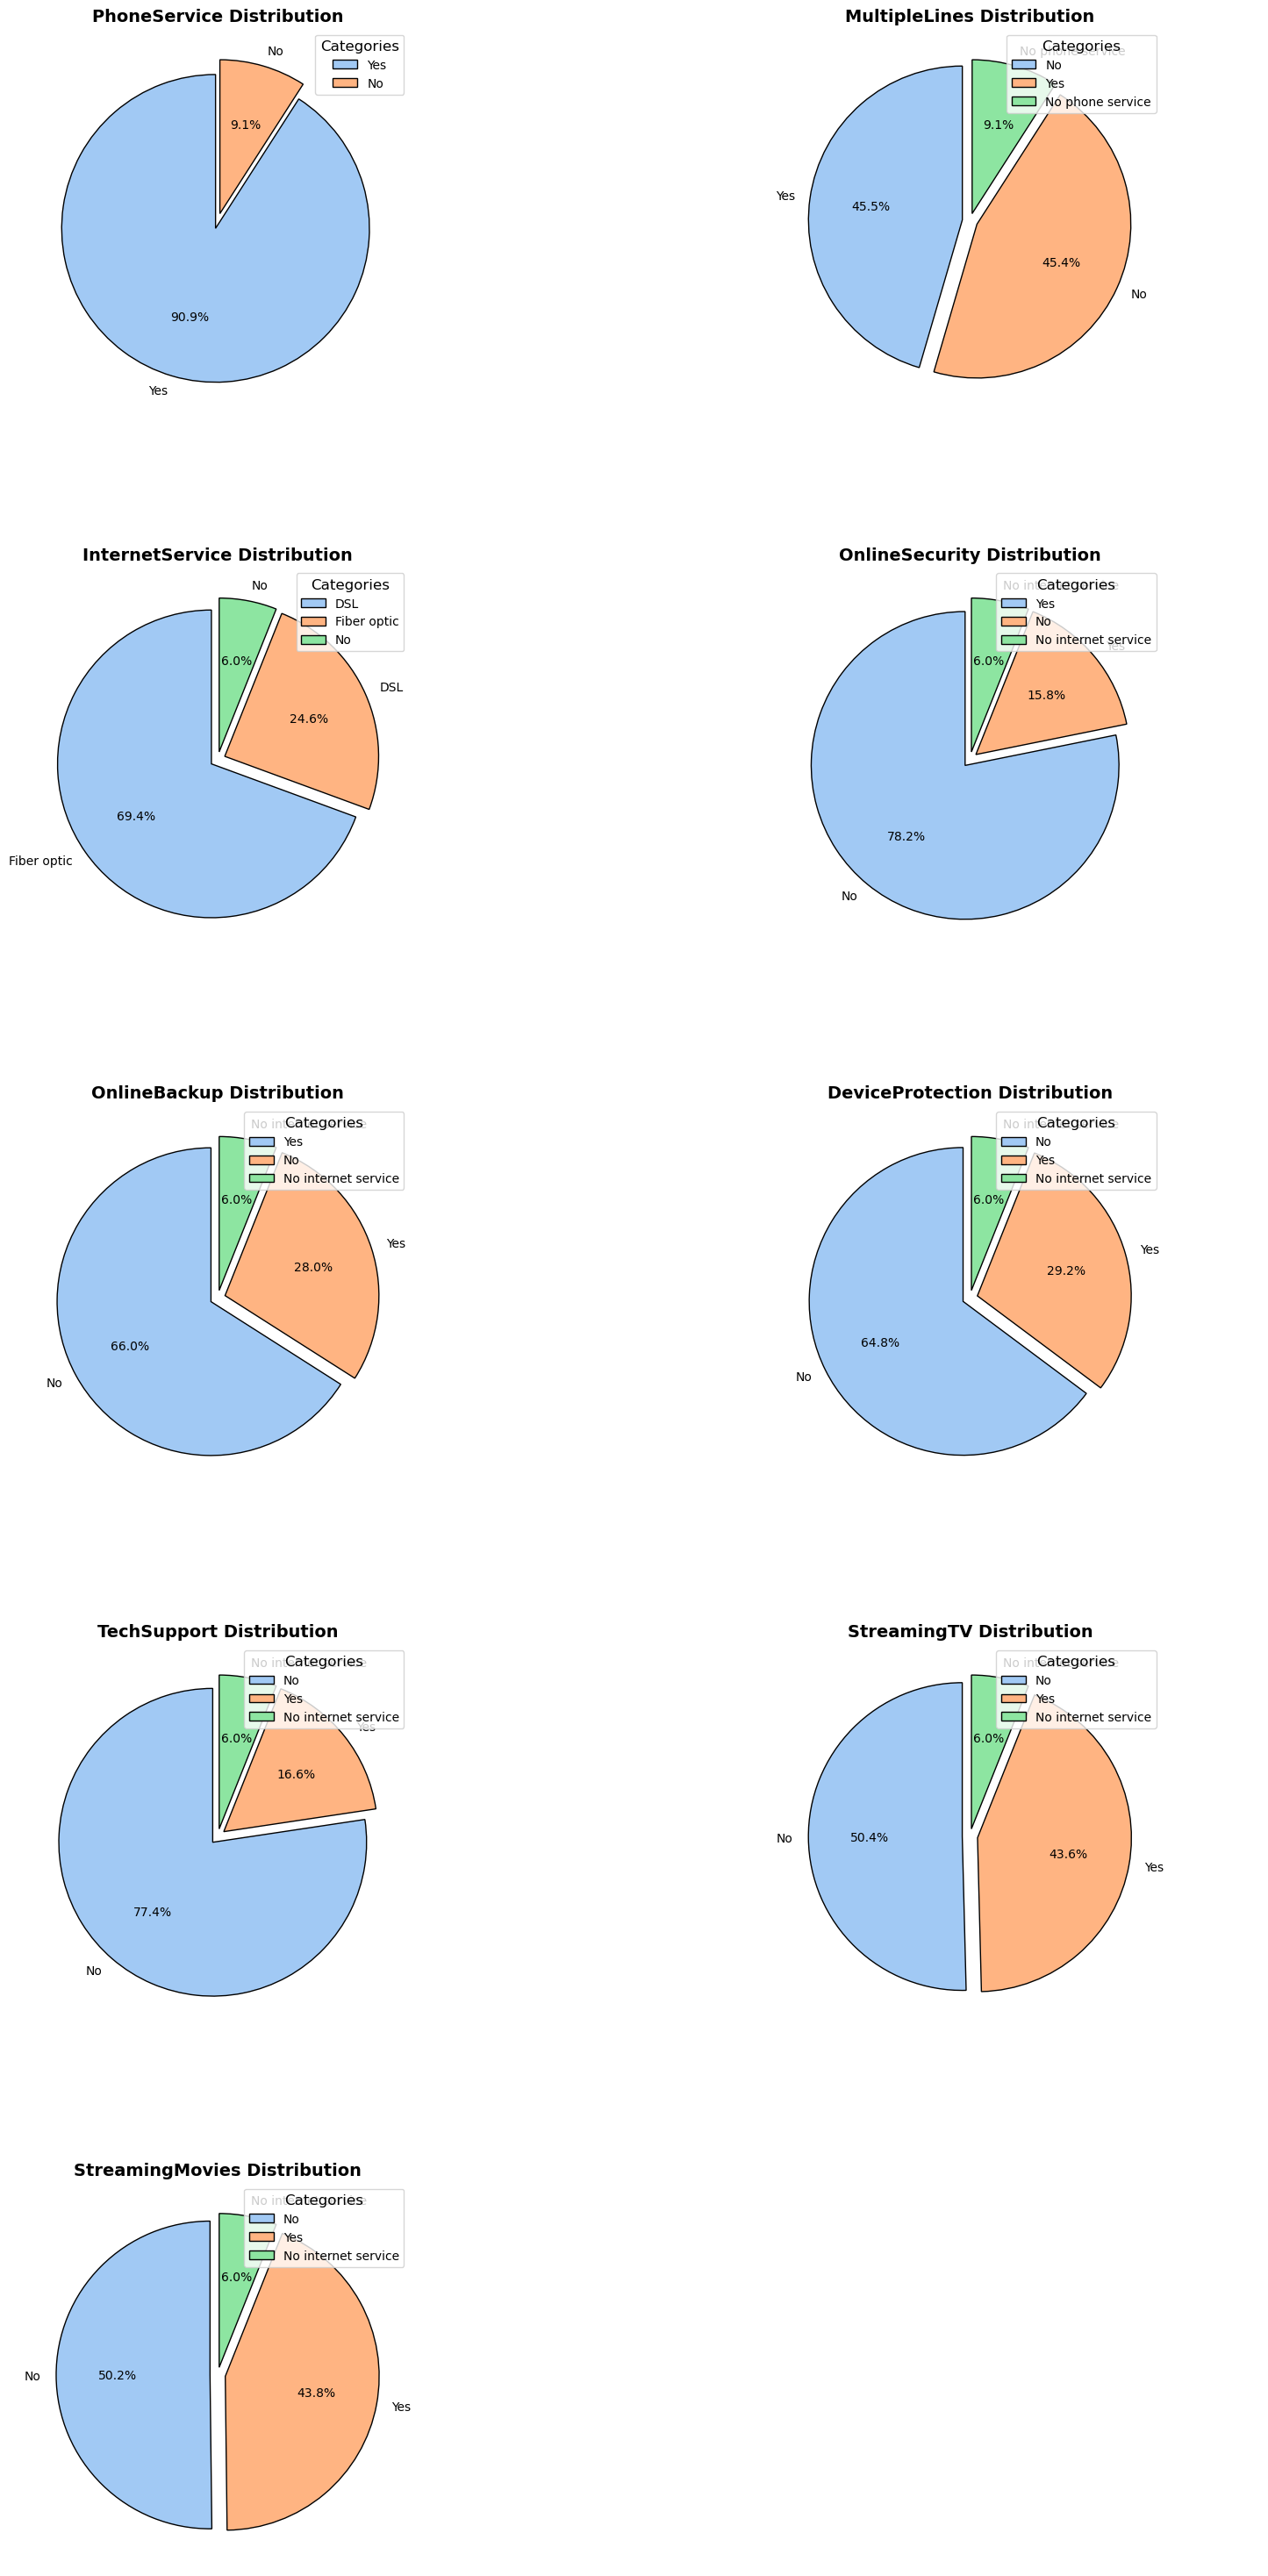

In [13]:
analyzer.plot_churn_data(customer_services_cols)

As we can see from the above graphs that
- Those who have phone service, Online Security, Online Backups are the one who churn the most
- Those who don't have device protection and tech support are also most likely to churn

###Let's Look at the overall data instead of Churn Customer data and visualize them

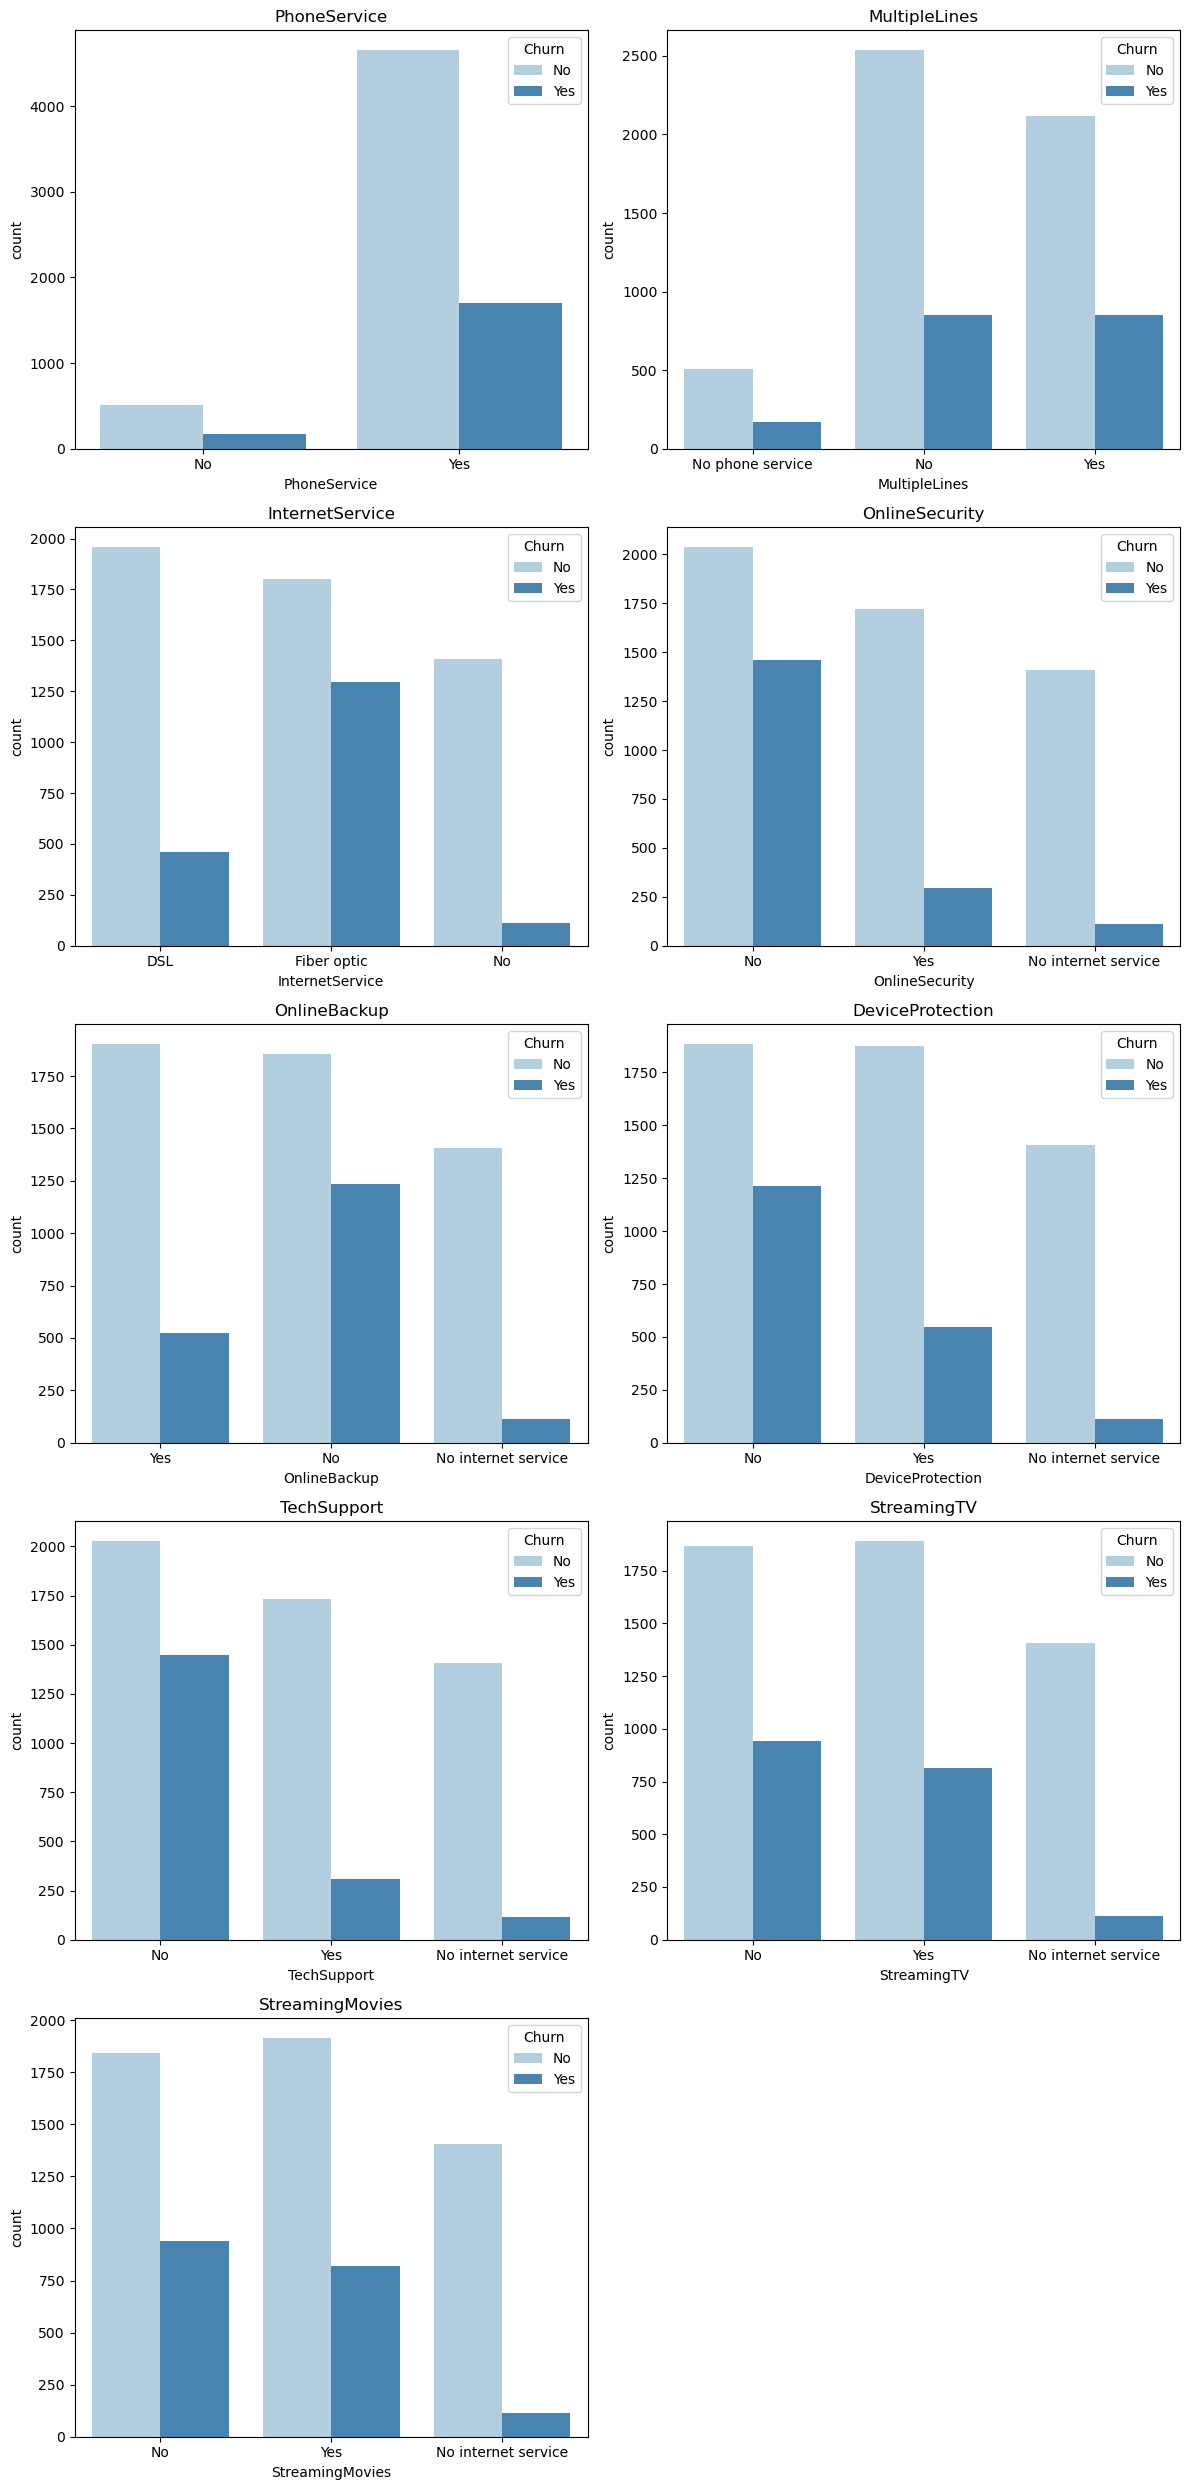

In [14]:
analyzer.plot_categorical_to_target(customer_services_cols, "Churn")

This is almost the same visualization but this time with the complete dataset instead of only Churn Customer

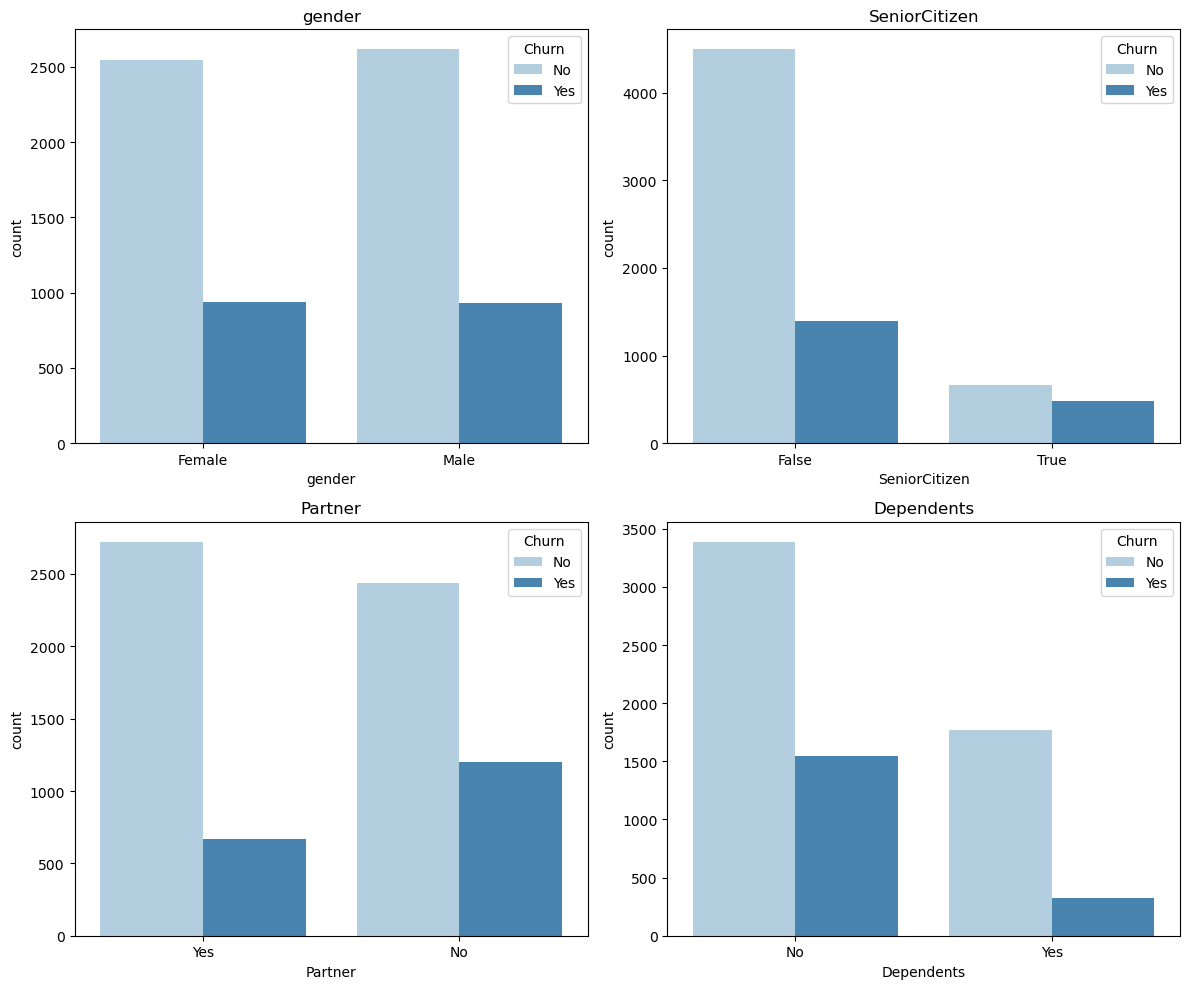

In [15]:
analyzer.plot_categorical_to_target(demographics_cols, 'Churn')

#### Let's have look at the outliers in the numerical columns

f:\bot\test\task\Data_Analyzer.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
f:\bot\test\task\Data_Analyzer.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
f:\bot\test\task\Data_Analyzer.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


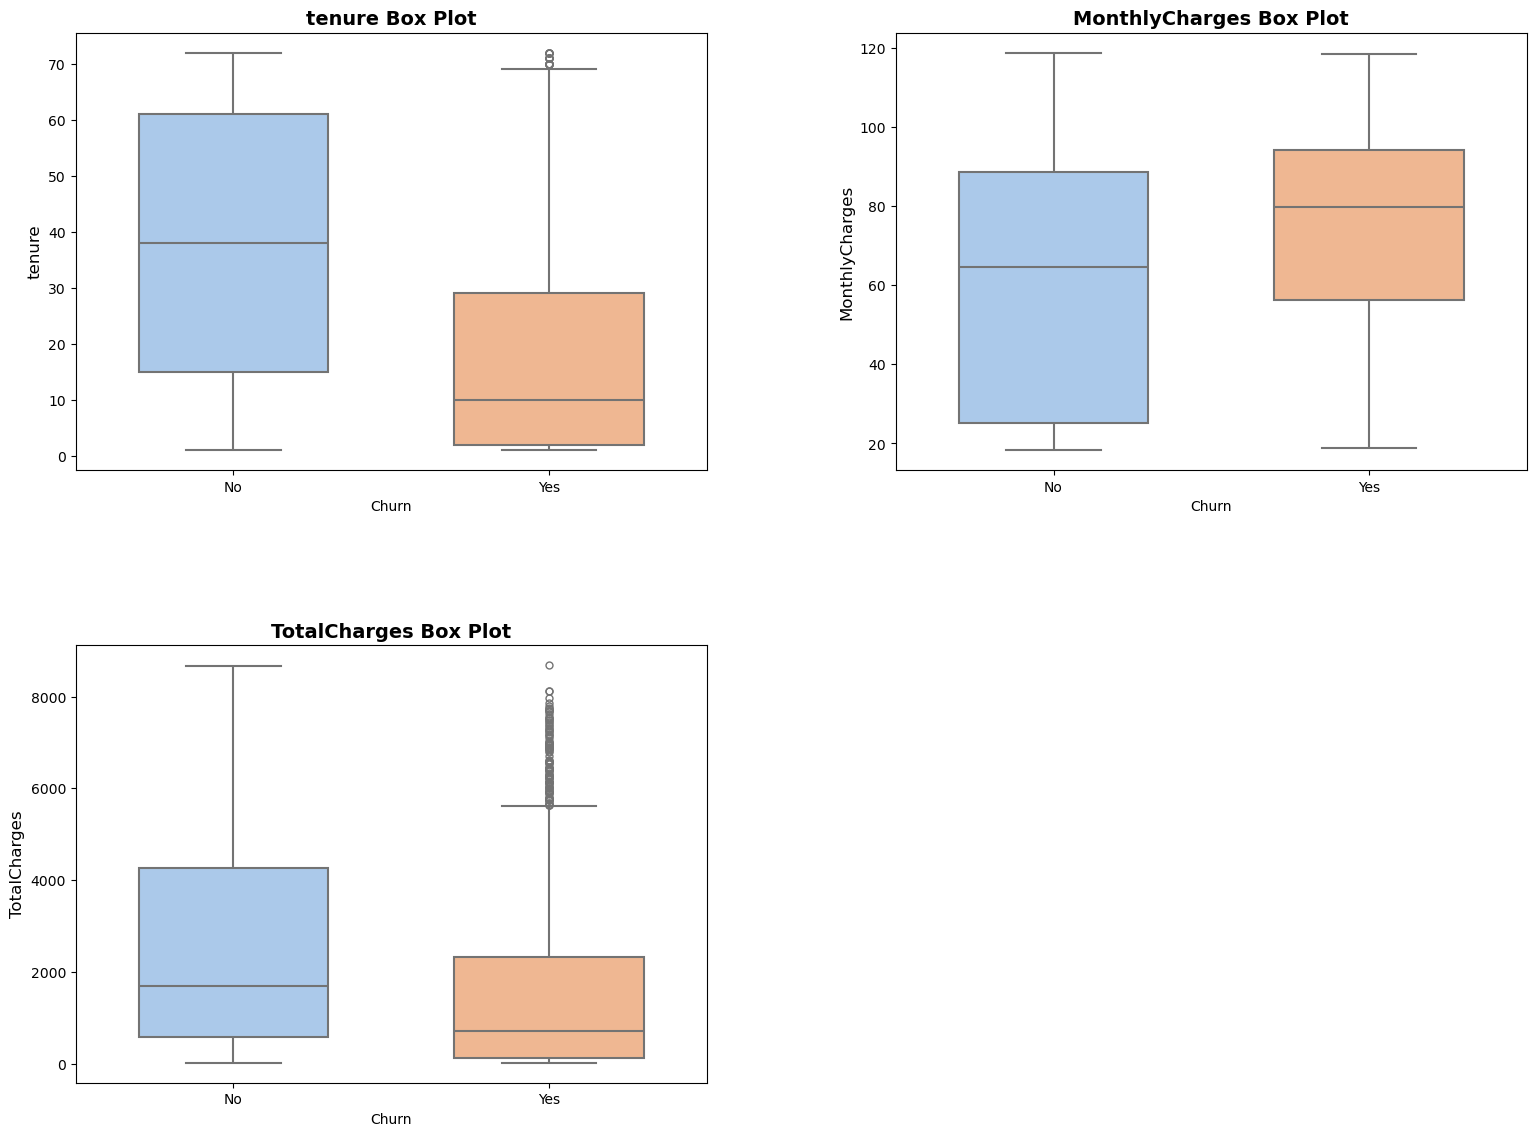

In [16]:
analyzer.plot_numeric_boxplots(numeric_cols)

As we can see that for churn customer, the Total chargers are too high for them

Let's see a histogram as well what the values are

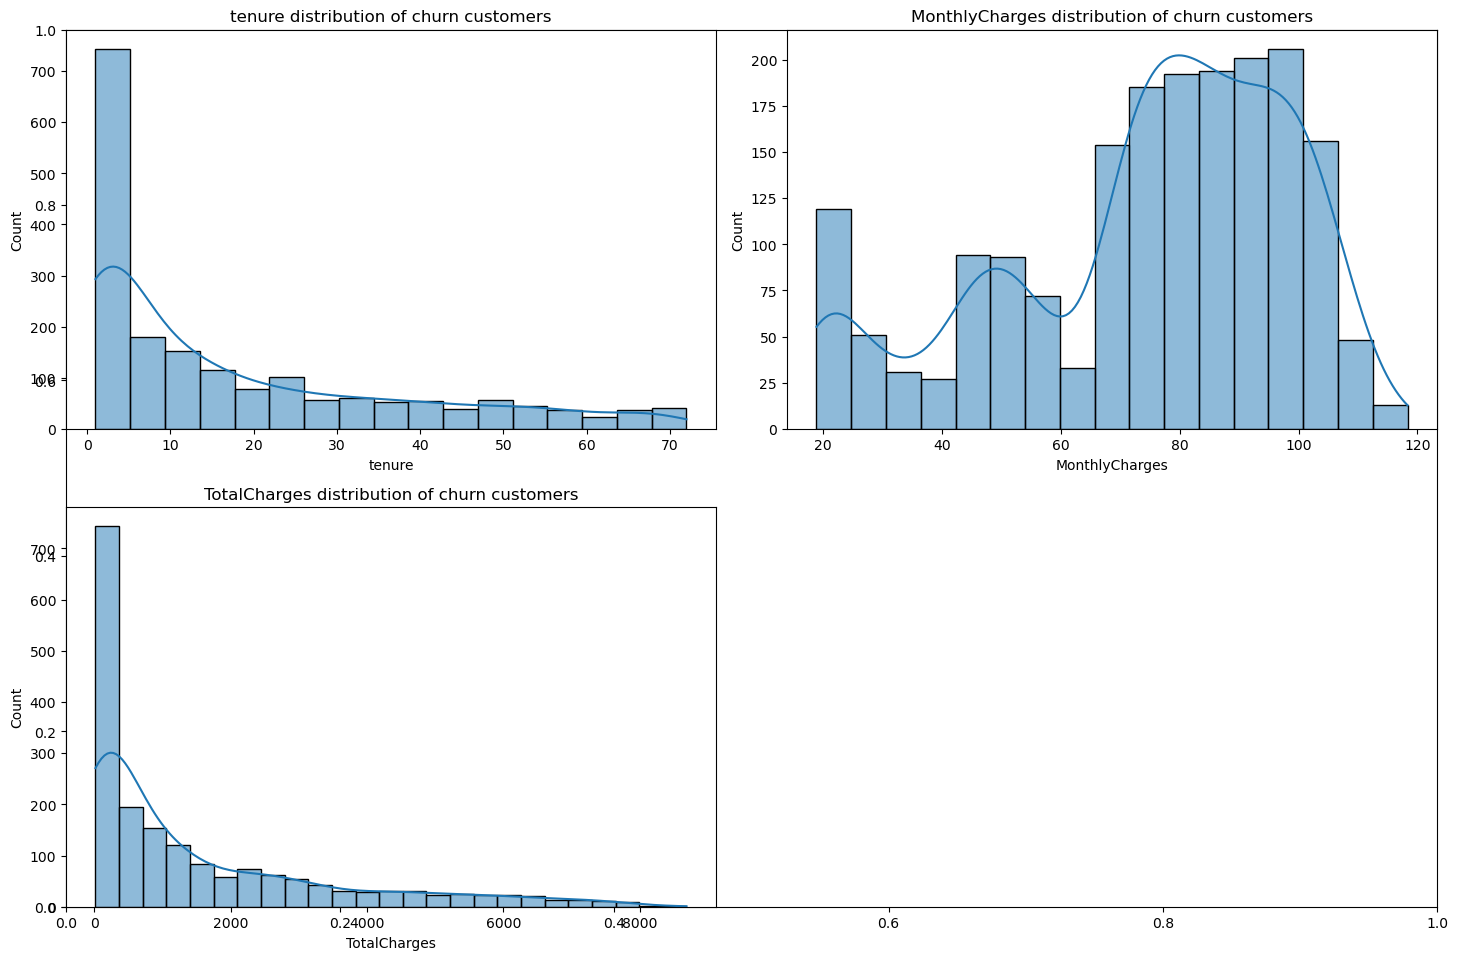

In [17]:
analyzer.plot_numerical_histogram(numeric_cols)

It look like that the Total Charge has some value that may seems like the outliers. We will proceed with these values for now

## Let's do now Some Data Engineering

##### First we will perform Label encoding for all those columns have 2 values like Yes, No

In [18]:
df = analyzer.df
feature_label = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_label)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

Let's now perfrom one hot encoding for all those features that has more then 2 values

In [19]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

Let's now do feature scaling to get the scaled feature for data. We will only do that for numerical columns
<br>If we can't perform that, then we have some big value which might effect the performance. 


In [20]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

Now finally look at the correlation of the features with the target variable

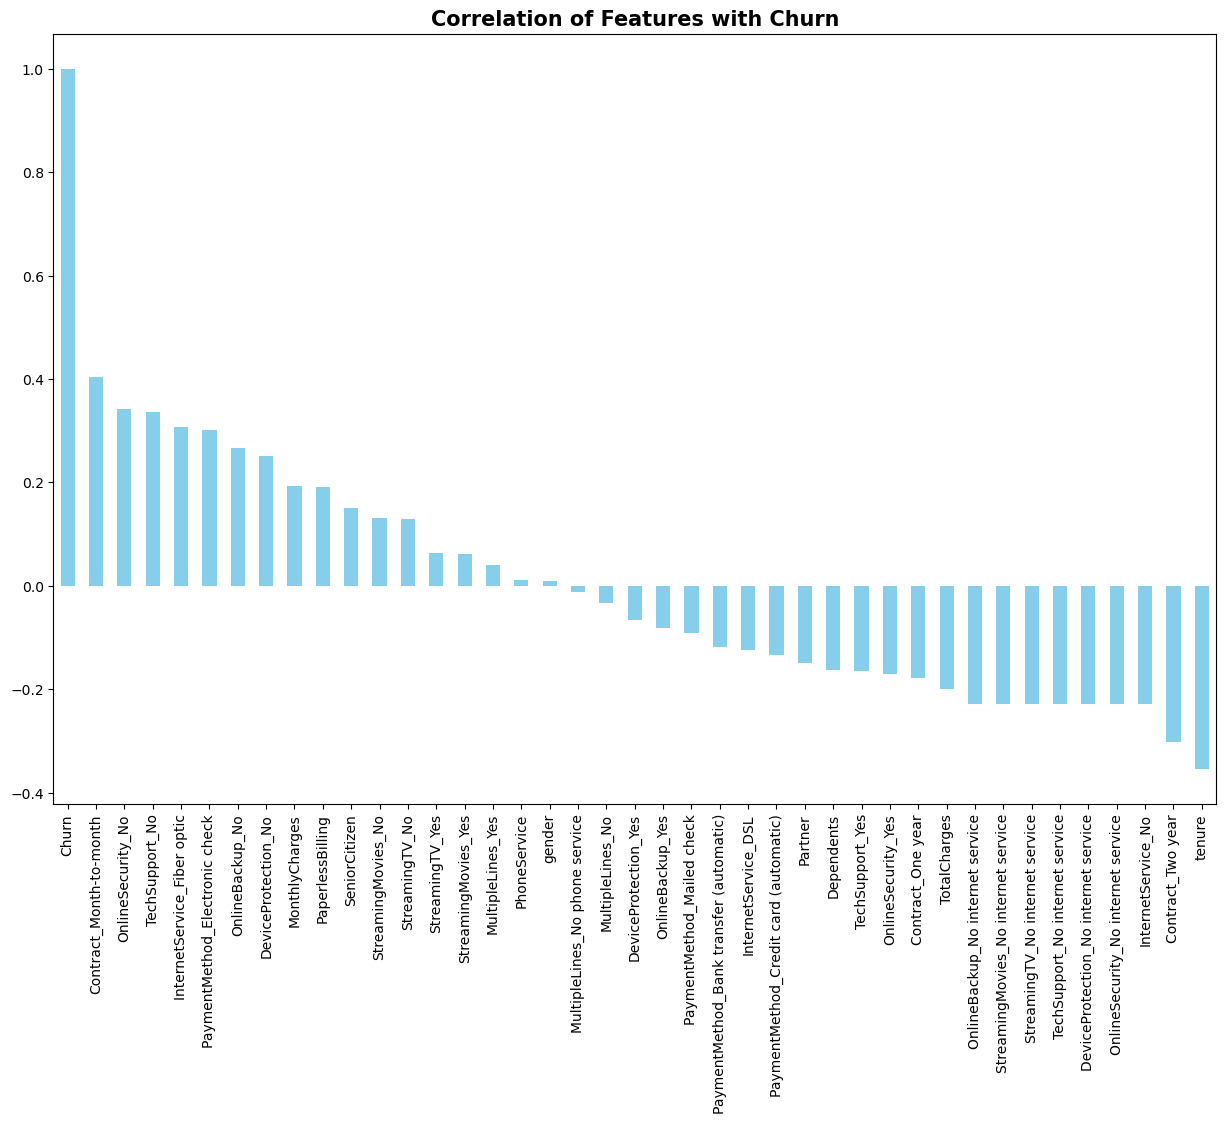

In [21]:
plt.figure(figsize=(15, 10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Churn', fontsize=15, fontweight='bold')
plt.show();

As we can see that the customer with month-to-month contract type is more likely to churn. This is because of the short-term contract type. If you see on other hand the contract type 2-years, it is less likely to churn. Similarly customer with long tenure are also less likely to leave the company. 
So one cause that may lead to churn is the contract type and tenure of the customer.

## Let's now move to next step of model selection and training

In [22]:
## First we will split the data into training, validation and testing set
X = df.drop('Churn', axis=1)
y = df['Churn']


In [23]:
models = Models(X, y)

Let's define the baseline model to which we compare our later results. We will use Dummy Classifier

In [24]:
models.baseline_model()

Training Accuracy: 0.73, Testing Accuracy: 0.73, F1 Score: 0.0


DummyClassifier(strategy='most_frequent')

Logistic Regression

In [25]:
lr = models.logistic_regression(cv=5, max_iter=1000)

Training Accuracy: 0.80, Testing Accuracy: 0.80, F1 Score: 0.5803310613437197


Random Forest

In [26]:
rf = models.random_forest(max_depth=8, n_estimators=10)

Training Accuracy: 0.83, Testing Accuracy: 0.79, F1 Score: 0.5617529880478087


After using different value for max_depth, the best it achieve is using 7 or 8. If we use greater then this, then the model go toward overfitting.OverflowError


K-nearest neighbour

In [27]:
# knn = models.k_neighbour(neighbours=5)

Support vector classifier

In [28]:
svc = models.svc_classifier()

Training Accuracy: 0.82, Testing Accuracy: 0.79, F1 Score: 0.5458248472505092


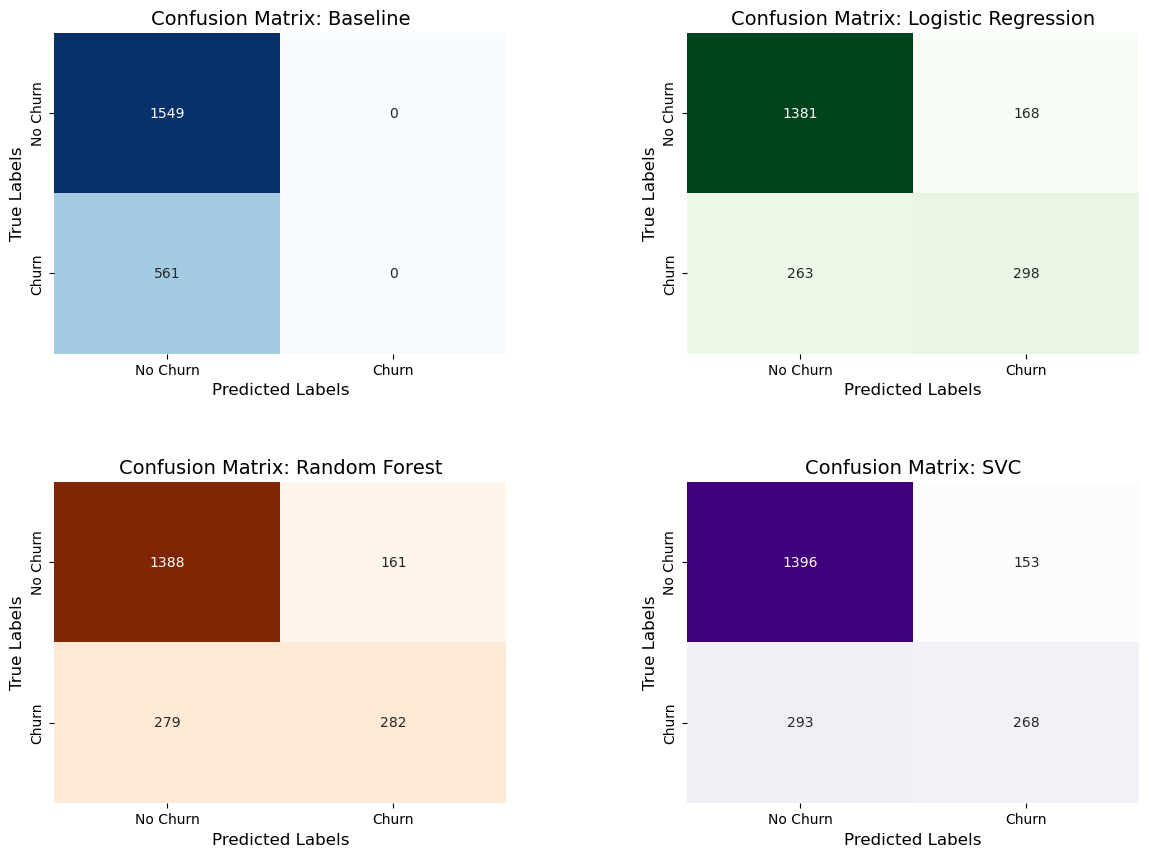

In [29]:
class_names = ['No Churn', 'Churn']
plot_confusion_matrices(models.results, class_names)

As we can see that we have issue correctly classifying the churn customers. Although the Logistic Regression give some better result by looking at the CM

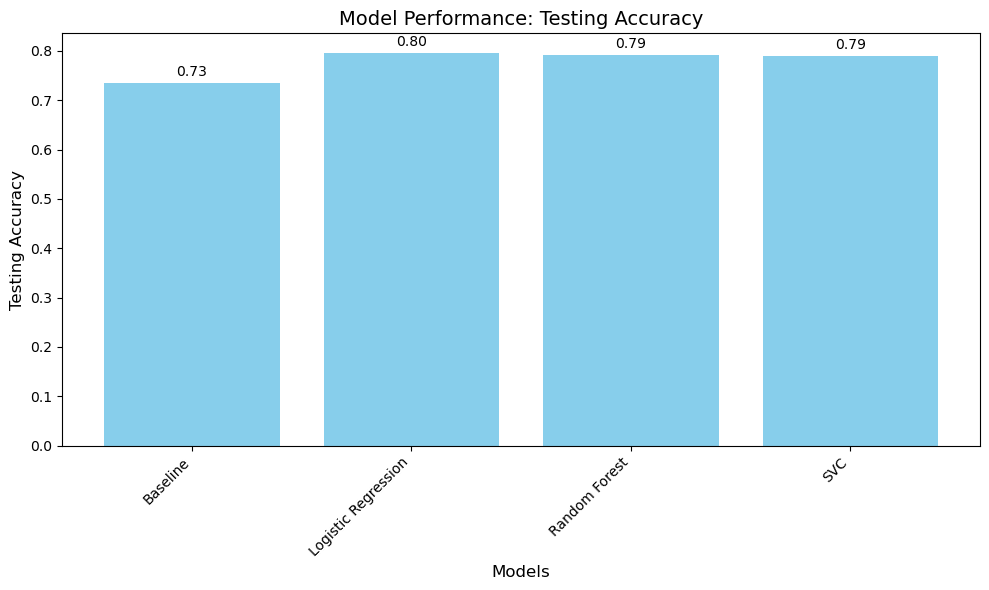

In [30]:
# Let see accuracies graph
plot_testing_accuracies(models.results)

The testing accuracy is around 80 for all.

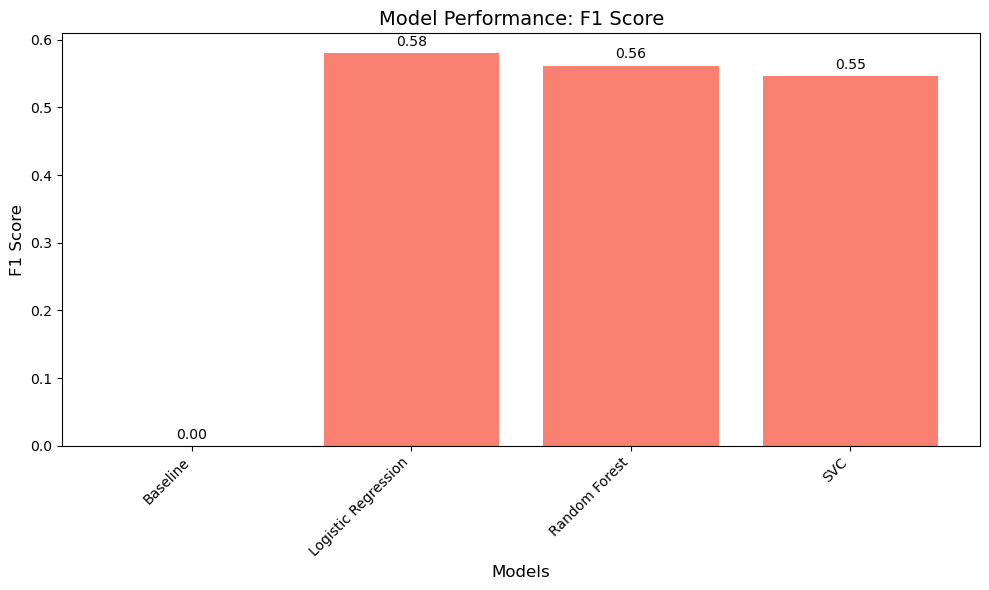

In [31]:
# Let's see F1 score graph
plot_f1_scores(models.results)

The F1 score is also better for simple logistic regression. This is the beauty of simple things

#### Uptil now we look at all colums. Let's now see and findout the most impactful cols and train using them

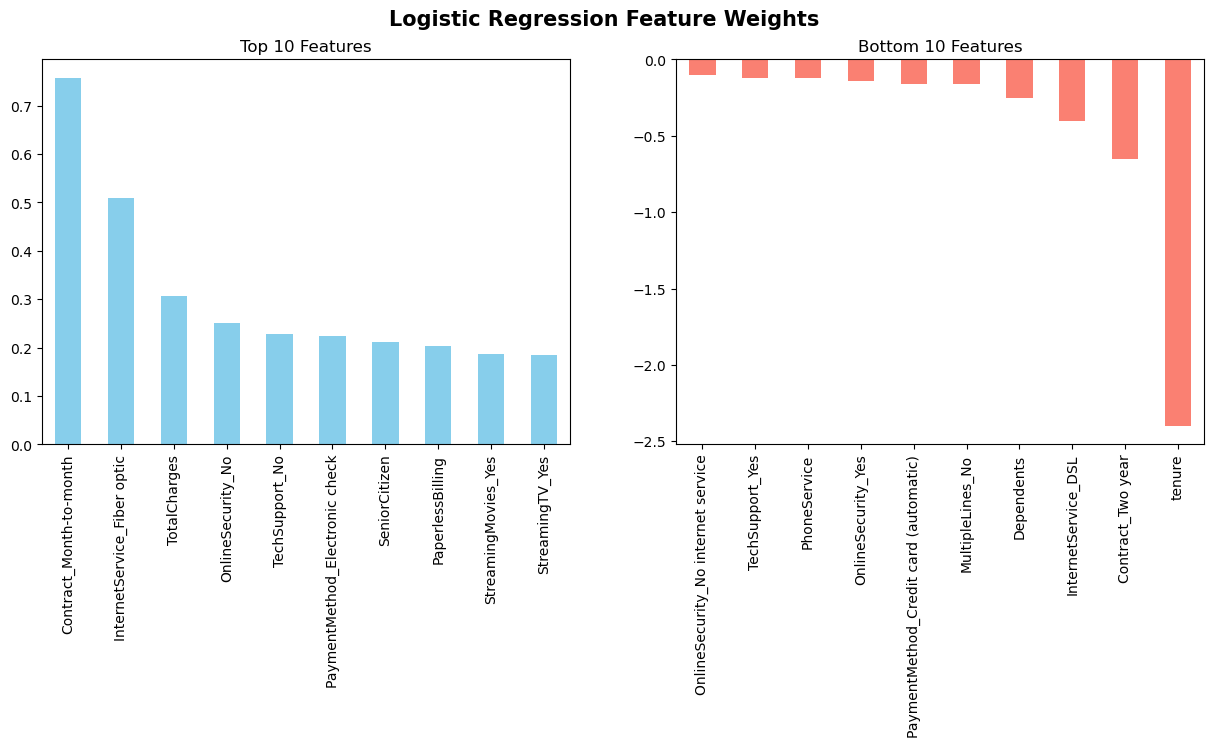

In [32]:
feature_weights(models.X_train, lr, 'Logistic Regression')

Let's see the important features of random forest as well

In [33]:
# Get feature importance
importances = rf.feature_importances_
feature_names = models.X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print(importance_df)

                                    Feature    Importance
33                  Contract_Month-to-month  1.586556e-01
0                                    tenure  1.306810e-01
1                            MonthlyCharges  1.049683e-01
2                              TotalCharges  1.031182e-01
15                        OnlineSecurity_No  7.755314e-02
13              InternetService_Fiber optic  5.734537e-02
24                           TechSupport_No  4.305026e-02
38           PaymentMethod_Electronic check  2.726438e-02
35                        Contract_Two year  2.591462e-02
34                        Contract_One year  2.588589e-02
18                          OnlineBackup_No  2.218166e-02
12                      InternetService_DSL  2.164909e-02
21                      DeviceProtection_No  1.765117e-02
22     DeviceProtection_No internet service  1.576412e-02
26                          TechSupport_Yes  1.530710e-02
19         OnlineBackup_No internet service  1.341181e-02
8             

As we can see some features are more important then other. Most of them has very low importance. So for next part we only select those features that has some importance. So we select all numerical columns and Contract type

In [34]:
# Function to give dataset only of selected features
def selected_features_df():
    selected_features = ['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract']
    df_temp = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    df_temp = wrangle(df_temp)
    df_temp = df_temp[selected_features + ['Churn']]
    df_temp = label_encoding(df_temp, ['Churn'])
    df_ohe = pd.get_dummies(df_temp, columns=['Contract'])

    features_mms = ["tenure","MonthlyCharges","TotalCharges"]

    df_mms = pd.DataFrame(df_ohe, columns=features_mms)
    df_remaining = df_ohe.drop(columns=features_mms)

    mms = MinMaxScaler(feature_range=(0,1))
    rescaled_feature = mms.fit_transform(df_mms)

    rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
    df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

    return df


df_selected_features = selected_features_df()

Let's now do all the steps that we have done for this as well

In [35]:
X = df_selected_features.drop('Churn', axis=1)
y = df_selected_features['Churn']

In [36]:
selected_features_models = Models(X, y)

In [37]:
# Let's train all models once and all
selected_features_models.baseline_model()
selected_features_models.logistic_regression(cv=5, max_iter=1000)
selected_features_models.random_forest(max_depth=8, n_estimators=10)
selected_features_models.k_neighbour(neighbours=5)
selected_features_models.svc_classifier()

Training Accuracy: 0.73, Testing Accuracy: 0.73, F1 Score: 0.0
Training Accuracy: 0.79, Testing Accuracy: 0.78, F1 Score: 0.5043668122270742
Training Accuracy: 0.82, Testing Accuracy: 0.79, F1 Score: 0.537037037037037
Training Accuracy: 0.84, Testing Accuracy: 0.76, F1 Score: 0.5128205128205129
Training Accuracy: 0.79, Testing Accuracy: 0.78, F1 Score: 0.48411829134720696


SVC(random_state=42)

It look like that the result is not imporoved that much. The result is still the same. So that doesn't make any difference 

## Let's try Neural Network Model

In [38]:
X_train, X_test, y_train, y_test = models.data_splitter()
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [39]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, batch_size=32)

Epoch 1/50
154/154 [==============================] - 2s 5ms/step - loss: 0.4851 - accuracy: 0.7564 - val_loss: 0.4388 - val_accuracy: 0.7853
Epoch 2/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4424 - accuracy: 0.7842 - val_loss: 0.4319 - val_accuracy: 0.7896
Epoch 3/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7952 - val_loss: 0.4327 - val_accuracy: 0.7886
Epoch 4/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8007 - val_loss: 0.4374 - val_accuracy: 0.7882
Epoch 5/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.7960 - val_loss: 0.4315 - val_accuracy: 0.7896
Epoch 6/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8062 - val_loss: 0.4301 - val_accuracy: 0.7948
Epoch 7/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8080 - val_loss: 0.4309 - val_accuracy: 0.7972
Epoch 

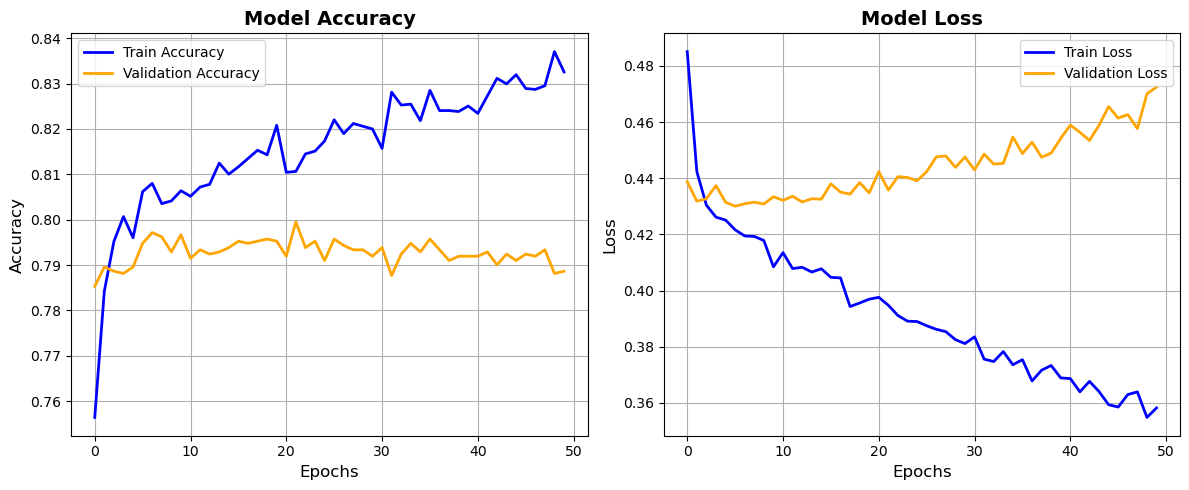

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot training and validation accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14, weight='bold')
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Plot training and validation loss
axes[1].plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14, weight='bold')
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


As we can see that after few epochs, the validation accuracy graphs almost become uniform. So traing more will lead to overfit the model. The same behaviour can be seen at the loss graph


In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

66/66 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7886
Test Accuracy: 0.79


The test accuracy is also around 80% the same as classical machine learning models


66/66 [==============================] - 0s 1ms/step


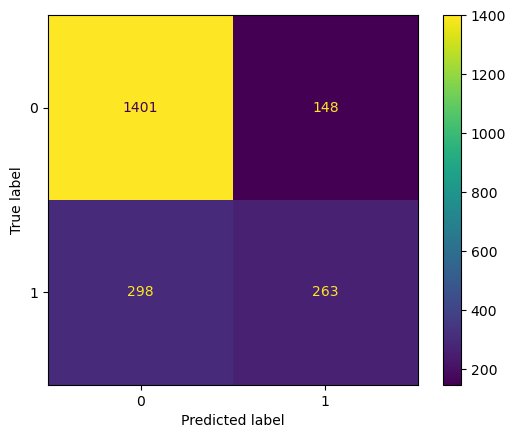

In [42]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In a Conclusion we can say:
- Customer who has longer tenure or two-year contract are less likely to churn as compare to those with smaller tenure and month-to-month contract
- Those who have no partner and are not dependent are most likely to churn. This suggest that people with less responsiblities are the one who leave the company. 
- The Simple Logistic Classifier gives us the best result with almost 80% of test accuracy
- There is lot of false positive cases which lead to low f1-score.
- The Neural Network doesn't improve the results to much. It gives us the same result


Future Works
- We can create combined features with 2-3 features
- We can apply data augmentation or oversampling or under-sampling to make the dataset balance
- We can apply advanced normalization technique in Neural networks like